In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [58]:
vendas = pd.read_excel('/home/lucas/Documentos/jupyter/varejo.xlsx')

In [59]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [60]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [61]:
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [62]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo') 

In [63]:
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [64]:
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace(' ', '_')
vendas['Nome_Departamento'] = vendas['Nome_Departamento'].str.replace('Cama,_Mesa_e_Banho', 'Cama_Mesa_e_Banho')
vendas.groupby('Nome_Departamento').idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama_Mesa_e_Banho           153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [65]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [66]:
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [67]:
vendas.fillna({'estado': 'MS'}, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [68]:
media_preco = vendas['Preço'].mean()

vendas.fillna({'Preço': media_preco}, inplace=True)

In [69]:
print(media_preco)

906.5891285439033


In [70]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [71]:
vendas[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [72]:
preco_errado = vendas.query('Preço > Preço_com_frete')

In [73]:
vendas_correto = vendas.query('Preço <= Preço_com_frete')

vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,79888.000000,79888,79888.000000,79888.000000,79888.000000
mean,251006.932831,2023-03-02 02:43:13.110354432,905.450941,910.367219,13932.167009
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126877.500000,2023-02-01 00:00:00,144.320000,151.128000,6916.000000
50%,251770.000000,2023-03-02 00:00:00,531.240000,535.200000,13932.000000
75%,375871.250000,2023-04-01 00:00:00,1199.200000,1219.120000,20915.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144233.055210,NaN,1056.303339,1058.507787,8065.827020


In [74]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742


In [75]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,191.000000,191,191.00000,191.000000,191.000000
mean,272904.240838,2023-03-05 02:53:24.188481792,1010.24356,1035.426052,14317.968586
min,2145.000000,2023-01-02 00:00:00,10.89600,16.112000,210.000000
25%,162705.000000,2023-02-03 12:00:00,519.20000,523.200000,7699.000000
50%,263305.000000,2023-03-05 00:00:00,1039.20000,1060.392000,15256.000000
75%,392710.000000,2023-04-04 12:00:00,1471.20000,1499.124000,20637.000000
max,497570.000000,2023-04-30 00:00:00,2399.20000,2432.744000,27841.000000
std,140870.980710,NaN,620.36360,625.940788,7852.326225


In [76]:
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).head().reset_index()

,Nome_Departamento,idcompra
0,Telefones_e_Celulares,14464
1,Eletrodomesticos,10466
2,Eletroportateis,9530
3,TVs_e_Acessorios,5319
4,Informatica,5273


In [77]:
round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.70
2,Informatica,2018.26
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08
5,Telefones_e_Celulares,1420.01
6,Eletrodomesticos,1235.42
7,Esporte_e_Lazer,1032.47
8,Tablets,963.60
9,Instrumentos_Musicais,834.61


In [78]:
vendas_correto.groupby('Data').idcompra.nunique().sort_values(ascending=False)

Data
2023-02-13    767
2023-03-14    734
2023-01-20    727
2023-02-10    722
2023-03-07    720
             ... 
2023-01-11    619
2023-03-01    613
2023-04-04    611
2023-01-03    607
2023-03-28    600
Name: idcompra, Length: 119, dtype: int64

In [79]:
# del vendas_correto['mês']

In [80]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742


In [81]:
vendas_correto['mes'] = vendas_correto['Data'].dt.month

In [82]:
vendas_correto.groupby('mes').idcompra.nunique().sort_values(ascending=False)

mes
3    18982
4    18297
1    18159
2    17332
Name: idcompra, dtype: int64

In [83]:
cliente = pd.read_excel('cliente_varejo.xlsx')

In [84]:
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [85]:
cliente[['idade', 'renda']].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [86]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [87]:
cliente = cliente.astype({'renda':'float'})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [88]:
vendas_cliente = vendas_correto.merge(cliente, how='left', on='cliente_Log')
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,53,11717.0
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0


In [89]:
agg_idcanal_renda = round(vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index(),2)

In [90]:
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8239.52
1,Internet,8236.37
2,Mobile,8233.43


In [91]:
agg_idade_bandeira = round(vendas_cliente.groupby('bandeira')['idade'].agg('mean').sort_values(ascending=False).reset_index(),2)

In [92]:
agg_idade_bandeira

,bandeira,idade
0,A,53.45
1,B,53.39


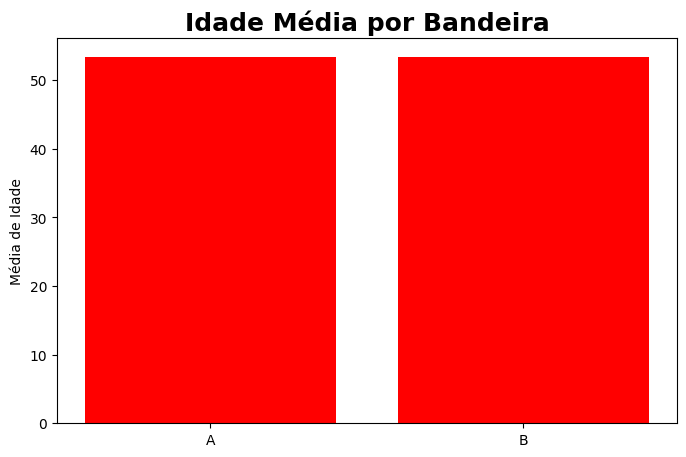

In [93]:
fig = plt.figure(figsize=(8,5))

plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'], color = 'red')

plt.ylabel('Média de Idade')

plt.title('Idade Média por Bandeira', loc='center', fontsize=18, fontweight='bold', color='black');

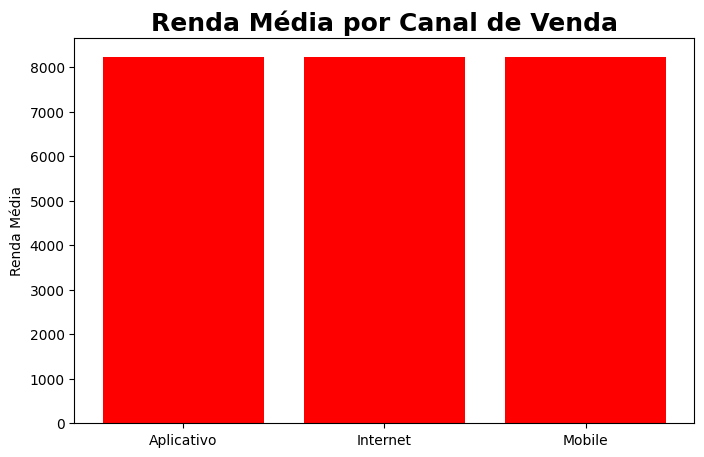

In [94]:
fig = plt.figure(figsize=(8,5))

plt.bar(agg_idcanal_renda['idcanalvenda'], agg_idcanal_renda['renda'], color='red')

plt.ylabel('Renda Média')

plt.title('Renda Média por Canal de Venda', loc='center', fontsize=18, fontweight='bold', color='black');

In [95]:
venda_por_data= vendas_correto.groupby('Data').idcompra.nunique().reset_index()

In [96]:
venda_por_data

,Data,idcompra
0,2023-01-02,665
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,669
4,2023-01-06,673
...,...,...
114,2023-04-26,696
115,2023-04-27,711
116,2023-04-28,651
117,2023-04-29,682


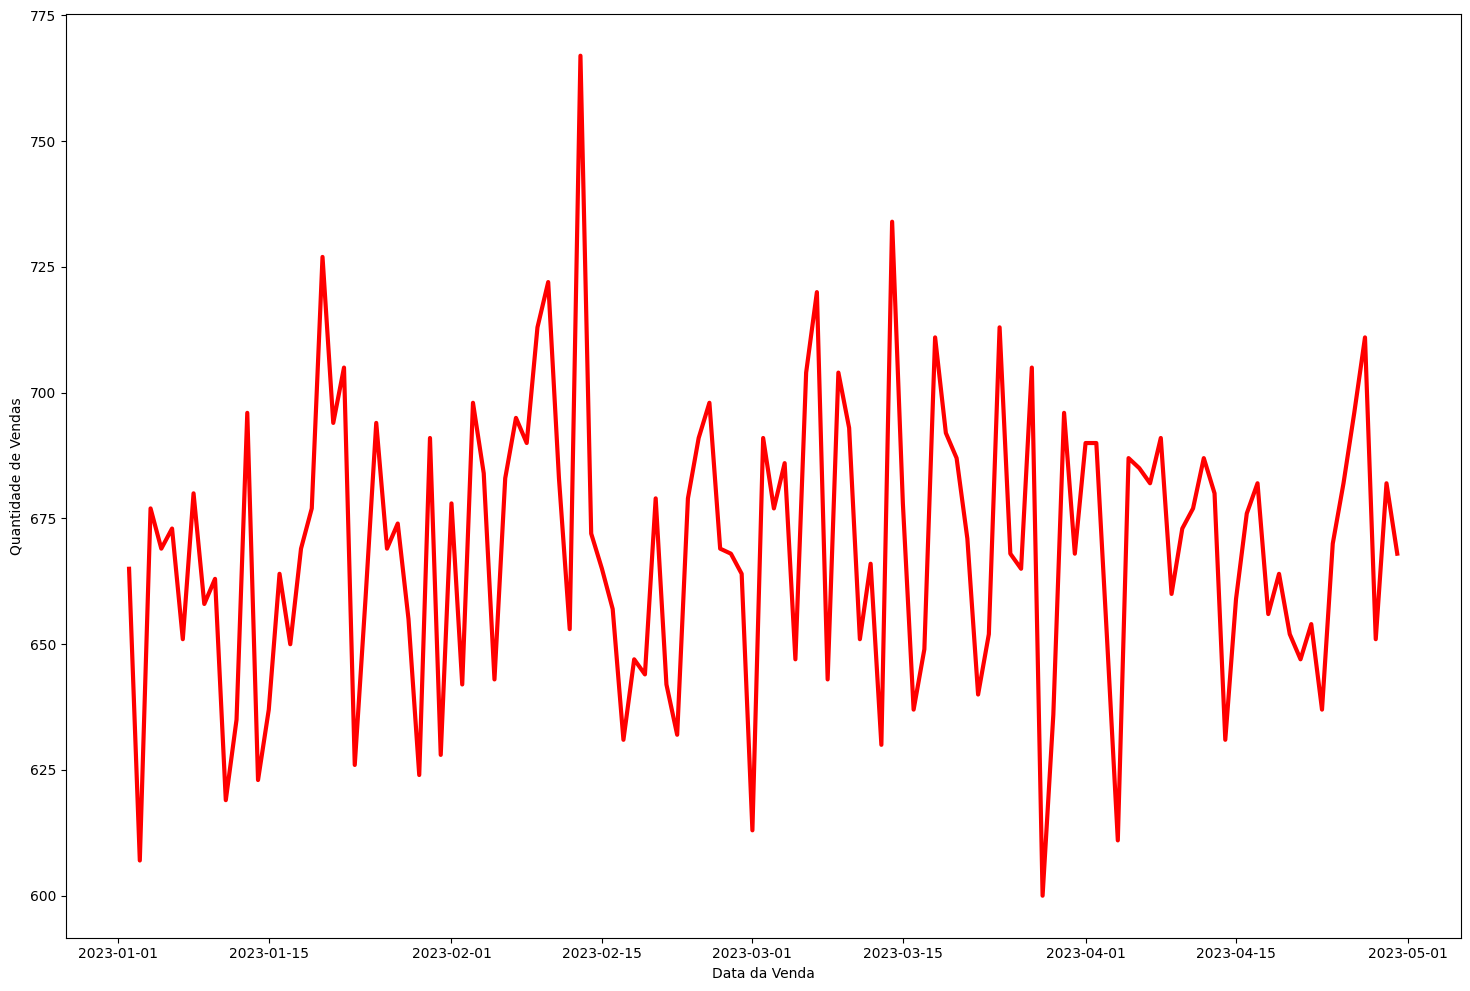

In [97]:
fig = plt.figure(figsize=(18,12))

plt.xlabel('Data da Venda')

plt.ylabel('Quantidade de Vendas')

x = venda_por_data['Data']
y = venda_por_data['idcompra']

plt.plot(x,y, color = 'red', linewidth='3')

plt.show()

In [98]:
agg_dept_preco = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.70
2,Informatica,2018.26
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08
5,Telefones_e_Celulares,1420.01
6,Eletrodomesticos,1235.42
7,Esporte_e_Lazer,1032.47
8,Tablets,963.60
9,Instrumentos_Musicais,834.61


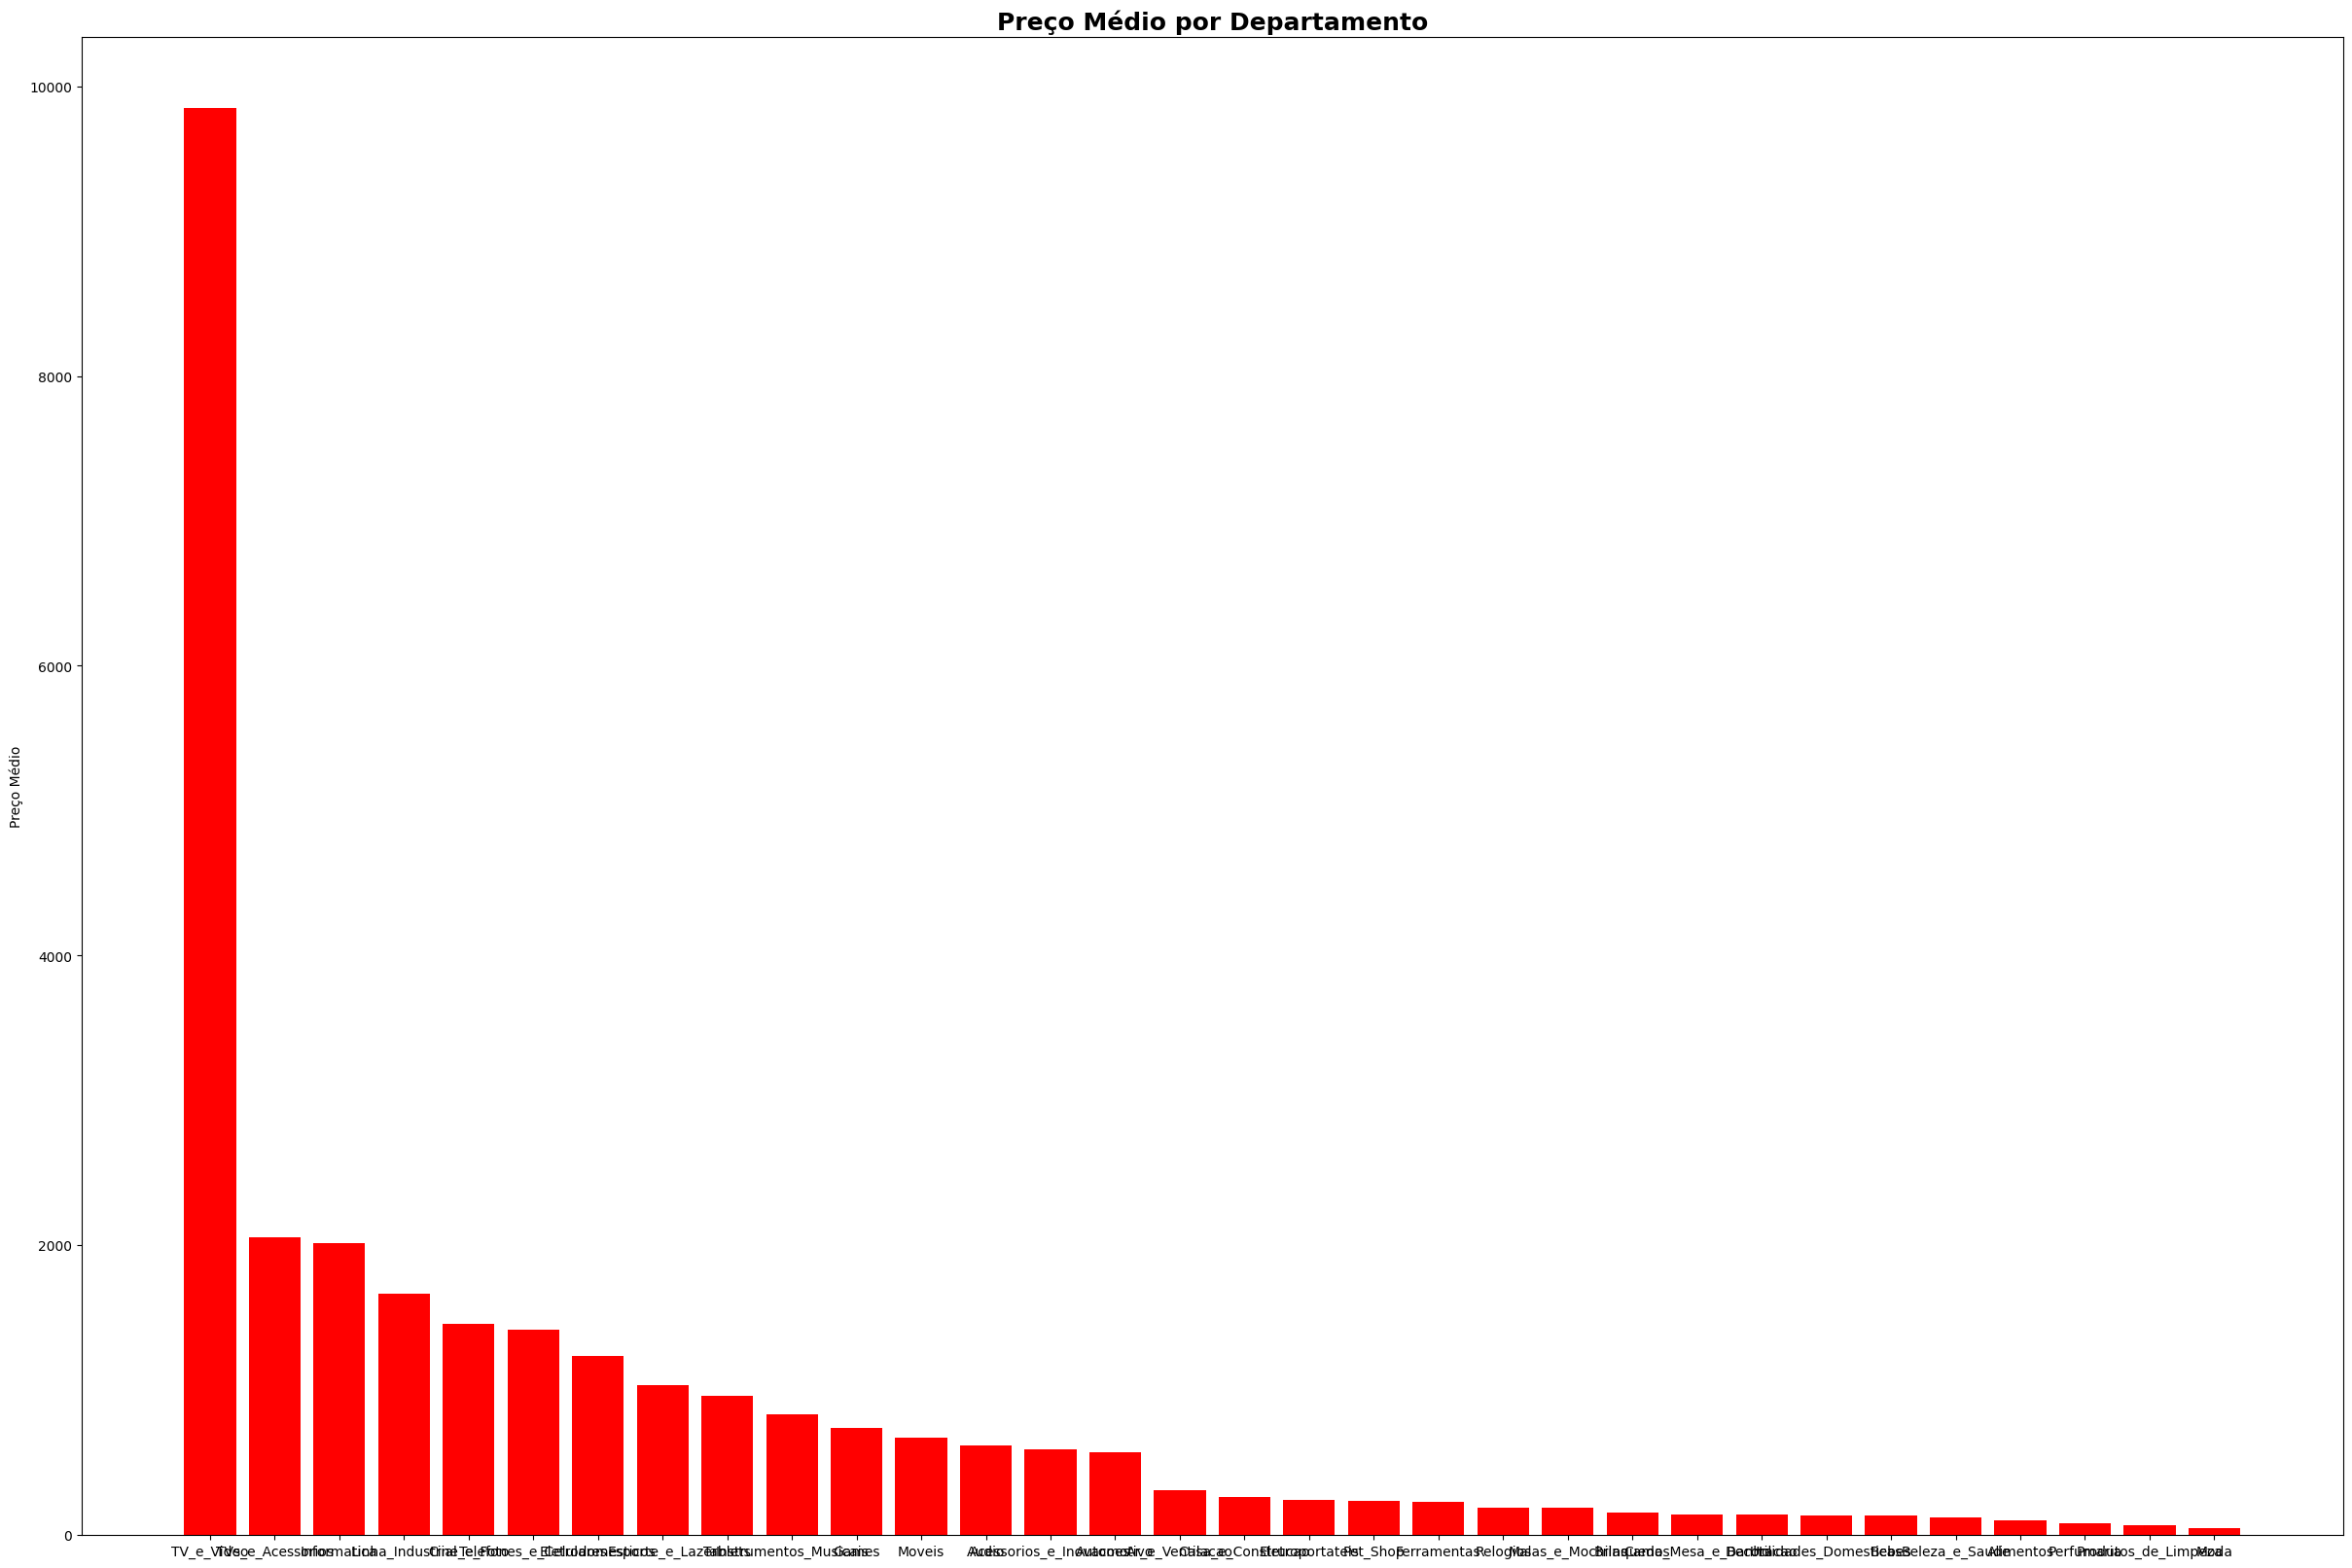

In [99]:
fig = plt.figure(figsize=(30,20))

plt.bar(agg_dept_preco['Nome_Departamento'], agg_dept_preco['Preço_com_frete'], color='red')

plt.ylabel('Preço Médio')

plt.title('Preço Médio por Departamento', loc='center', fontsize=18, fontweight='bold', color='black');

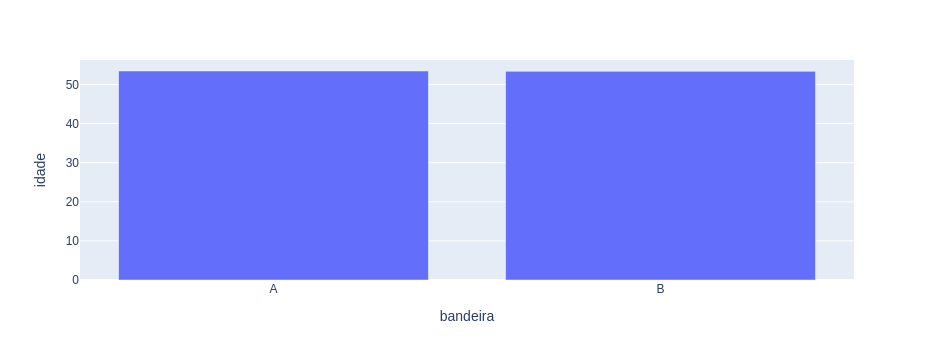

In [101]:
px.bar(agg_idade_bandeira, x = 'bandeira', y = 'idade')

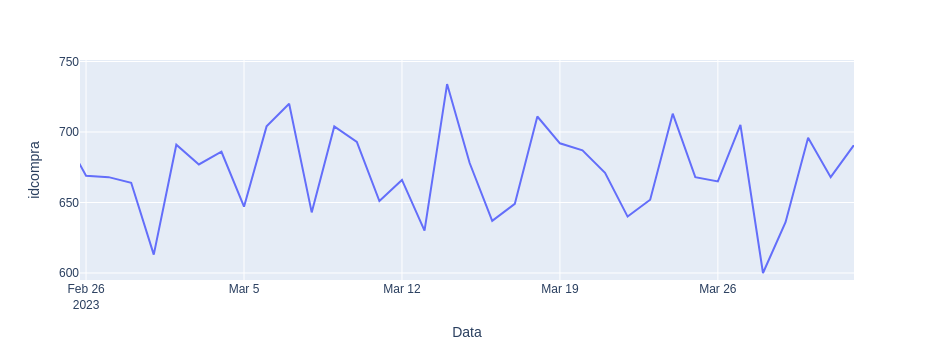

In [102]:
px.line(venda_por_data, x = 'Data', y = 'idcompra')

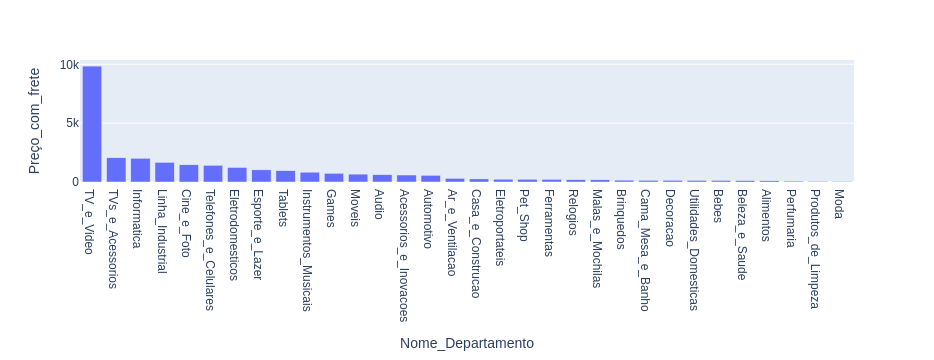

In [103]:
px.bar(agg_dept_preco, x = 'Nome_Departamento', y = 'Preço_com_frete')